# DSE Course 3, Lab 1: Practice with FFNNs

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

<br>

---

<br>

In this lab we will compare the FFNN to the classification algorithms we created in Course 2.

<br>

---




# Data and Helper Functions

In [153]:
import plotly.express as px
from sklearn.datasets import make_blobs, make_moons
X, y = make_blobs(random_state=42, centers=2, cluster_std=3)
X, y = make_moons(random_state=42, noise=.05, n_samples=1000)
px.scatter(x=X[:,0],y=X[:,1],color=y.astype(str))

In [170]:
def plot_boundaries(X, clf, ax=False):
  plot_step = 0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
  
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  
  if ax:
    cs = ax.contourf(xx, yy, Z, cmap='viridis', alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, cmap='viridis', edgecolor='grey', alpha=0.9)
    return ax
  else:
    cs = plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', edgecolor='grey', alpha=0.9)
  

# L1 Q1: 

Build and train a linear classification model using keras tf. Verify that the model is linear by either showing the weights or plotting the decision boundary (hint: you can use `plot_boundaries` above).

In [182]:
# Code Cell for L1 Q1
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    layers.Dense(1, input_shape=[X.shape[1]]),
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(X,y,
          batch_size=100,
          epochs=50,
          verbose=0)

model.summary()

results = pd.DataFrame(history.history)
display(results.tail())

y_pred = model.predict(X) > 0.5
px.scatter(x=X[:,0],y=X[:,1],color=y_pred.astype(str))

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_173 (Dense)            (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


,loss,binary_accuracy
45,0.740238,0.848
46,0.724938,0.847
47,0.712257,0.846
48,0.699722,0.844
49,0.678895,0.843


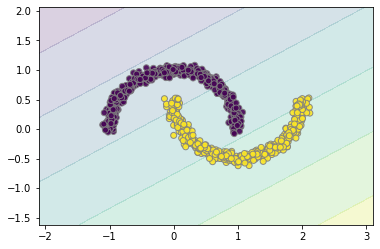

In [183]:
plot_boundaries(X, model)

# L1 Q2:

Now add an activation function to your previous model. Does the model become non-linear?


In [184]:
# Code Cell for L1 Q2

model = keras.Sequential([
    layers.Dense(2, activation='swish', input_shape=[X.shape[1]]),
    layers.Dense(2, activation='swish'),
    layers.Dense(2, activation='swish'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(X,y,
          batch_size=100,
          epochs=100,
          verbose=0)

results = pd.DataFrame(history.history)

display(results.tail())

y_pred = model.predict(X) > 0.5
px.scatter(x=X[:,0],y=X[:,1],color=y_pred.astype(str))

,loss,binary_accuracy
95,0.289320,0.896
96,0.287658,0.897
97,0.286138,0.898
98,0.284706,0.899
99,0.283295,0.899


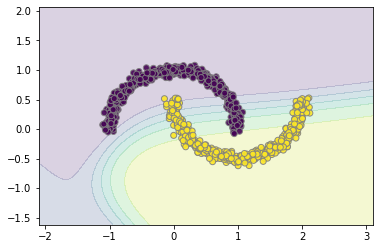

In [185]:
plot_boundaries(X, model)

# L1 Q3:

Continue to add complexity to your Q3 model until  you get an accuracy above 99%

In [186]:
# Code Cell for L1 Q3

model = keras.Sequential([
    layers.Dense(10, activation='swish', input_shape=[X.shape[1]]),
    layers.Dense(10, activation='swish'),
    layers.Dense(10, activation='swish'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(X,y,
          batch_size=100,
          epochs=100,
          verbose=0)

results = pd.DataFrame(history.history)

display(results.tail())

y_pred = model.predict(X) > 0.5
px.scatter(x=X[:,0],y=X[:,1],color=y_pred.astype(str))

,loss,binary_accuracy
95,0.011177,1.0
96,0.010597,1.0
97,0.010148,1.0
98,0.009640,1.0
99,0.009195,1.0


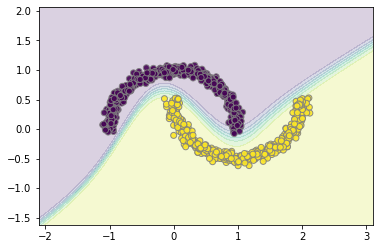

In [187]:
plot_boundaries(X, model)